Sentiment analysis, a pivotal aspect of natural language processing, can be approached through two distinct yet effective methods: fuzzy logic and GRU (Gated Recurrent Unit) architecture. Fuzzy logic, with its nuanced and flexible reasoning, excels in capturing the imprecise nature of human emotions, offering an understanding of possible subtleties. On the other hand, sentiment analysis with GRU architecture leverages the power of deep learning and sequential data processing, enabling it to grasp intricate patterns and dependencies in language.

Comparing these two methodologies is invaluable for several reasons. First, it allows for a comprehensive assessment of their respective strengths and weaknesses, aiding in the selection of the most suitable approach for specific use cases. Additionally, understanding the nuances of fuzzy logic and GRU-based sentiment analysis contributes to the advancement of sentiment analysis as a whole, fostering innovation and refinement in the field of natural language processing.

Comparative analysis serves as a foundation for informed decision-making, guiding practitioners towards optimal solutions that align with the intricacies of sentiment interpretation in diverse contexts. Overall, the juxtaposition of fuzzy logic and GRU architecture in sentiment analysis not only enhances our comprehension of emotional nuances but also facilitates the continual evolution of sophisticated and accurate language understanding models.

To do:
* explore library options for unsupervised fuzzy learning model.
* Build model from basic Vader code



Citation for utlized and edited Fuzzy Logic code:
Vashishtha, Srishti, and Seba Susan. "Fuzzy Rule based Unsupervised Sentiment Analysis from Social Media Posts." Expert Systems with Applications (2019): 112834.

In [ ]:
!pip install -U scikit-fuzzy

In [3]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import time
from finvader import finvader

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:

start = time.time()



traindata=pd.read_csv("/content/drive/MyDrive/colab/data/fin_data.csv",encoding="UTF-8")
doc=traindata.Sentence      #text to analyze
print(len(doc))
sentiment_doc=traindata.Sentiment #sentiment label

5842


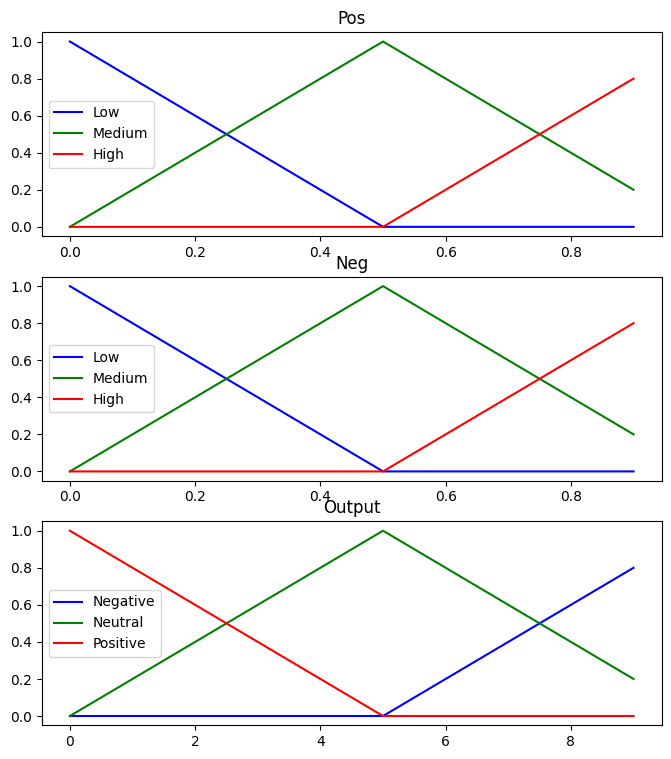

In [6]:


# Generate universe variables
#   * pos and neg on subjective ranges [0, 1]
#   * op has a range of [0, 10] in units of percentage points
x_p = np.arange(0, 1, 0.1)
x_n = np.arange(0, 1, 0.1)
x_op = np.arange(0, 10, 1)

# Generate fuzzy membership functions
p_lo = fuzz.trimf(x_p, [0, 0, 0.5])
p_md = fuzz.trimf(x_p, [0, 0.5, 1])
p_hi = fuzz.trimf(x_p, [0.5, 1, 1])
n_lo = fuzz.trimf(x_n, [0, 0, 0.5])
n_md = fuzz.trimf(x_n, [0, 0.5, 1])
n_hi = fuzz.trimf(x_n, [0.5, 1, 1])
op_Neg = fuzz.trimf(x_op, [0, 0, 5])  # Scale : Neg Neu Pos
op_Neu = fuzz.trimf(x_op, [0, 5, 10])
op_Pos = fuzz.trimf(x_op, [5, 10, 10])

# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))
#
ax0.plot(x_p, p_lo, 'b', linewidth=1.5, label='Low')
ax0.plot(x_p, p_md, 'g', linewidth=1.5, label='Medium')
ax0.plot(x_p, p_hi, 'r', linewidth=1.5, label='High')
ax0.set_title('Pos')
ax0.legend()

ax1.plot(x_n, n_lo, 'b', linewidth=1.5, label='Low')
ax1.plot(x_n, n_md, 'g', linewidth=1.5, label='Medium')
ax1.plot(x_n, n_hi, 'r', linewidth=1.5, label='High')
ax1.set_title('Neg')
ax1.legend()

ax2.plot(x_op, op_Pos, 'b', linewidth=1.5, label='Negative')
ax2.plot(x_op, op_Neu, 'g', linewidth=1.5, label='Neutral')
ax2.plot(x_op, op_Neg, 'r', linewidth=1.5, label='Positive')
ax2.set_title('Output')
ax2.legend()

# Turn off top/right axes
#for ax in (ax0, ax1, ax2):
#    ax.spines['top'].set_visible(False)
#    ax.spines['right'].set_visible(False)
#    ax.get_xaxis().tick_bottom()
#    ax.get_yaxis().tick_left()

In [7]:
#plt.tight_layout()

posts=[]
senti=[]
sentiment=[]
sentiment_doc=[]

for j in range(len(doc)):
    str1=traindata.Sentence[j]  #Financial post text
    str2=str1.lower()
    posts.append(str2)   # converted into lower case
    senti.append(traindata.Sentiment[j])


In [36]:
print(len(posts))
print(len(sentiment_doc))
print(len(senti))

5842
5842
5842


In [9]:
#data cleaning
def decontracted(phrase):   # text pre-processing
        # specific
        phrase = re.sub(r"won't", "will not", phrase)
        phrase = re.sub(r"can\'t", "can not", phrase)
        phrase = re.sub(r"@", "" , phrase)         # removal of @
        phrase =  re.sub(r"http\S+", "", phrase)   # removal of URLs
        phrase =  re.sub(r"www.", "", phrase)
        phrase = re.sub(r"#", "", phrase)          # hashtag processing

        # general
        phrase = re.sub(r"n\'t", " not", phrase)
        phrase = re.sub(r"\'re", " are", phrase)
        phrase = re.sub(r"\'s", " is", phrase)
        phrase = re.sub(r"\'d", " would", phrase)
        phrase = re.sub(r"\'ll", " will", phrase)
        phrase = re.sub(r"\'t", " not", phrase)
        phrase = re.sub(r"\'ve", " have", phrase)
        phrase = re.sub(r"\'m", " am", phrase)
        return phrase

In [12]:
for k in range(len(doc)):
    posts[k]=decontracted(posts[k])

sid = SentimentIntensityAnalyzer()

for j in range(len(doc)):
    sentiment_doc.append(senti[j])
    ss = sid.polarity_scores(posts[j])
    posscore=ss['pos']
    negscore=ss['neg']
    neuscore=ss['neu']
    compoundscore=ss['compound']

    print(str(j+1)+" {:-<65} {}".format(posts[j], str(ss)))

    print("\nPositive Score for this  post :")
    if (posscore==1):
        posscore=0.9
    else:
        posscore=round(posscore,1)
    print(posscore)

    print("\nNegative Score for this  post :")
    if (negscore==1):
        negscore=0.9
    else:
        negscore=round(negscore,1)
    print(negscore)

print("")

Streaming output truncated to the last 5000 lines.
0.1
5129 in the baltic countries , sales fell by 40.2 % , and in russia , by 23.2 % in terms of euros , and by 10.7 % in terms of local currency . {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Positive Score for each  post :
0.0

Negative Score for each  post :
0.0
5130 companieskingfisher bid for mr bricolage runs into trouble------- {'neg': 0.278, 'neu': 0.722, 'pos': 0.0, 'compound': -0.4019}

Positive Score for each  post :
0.0

Negative Score for each  post :
0.3
5131 the fair value change of investment properties was eur 15.8 mn , compared to eur 22.9 mn in the third quarter of 2009 . {'neg': 0.0, 'neu': 0.81, 'pos': 0.19, 'compound': 0.5719}

Positive Score for each  post :
0.2

Negative Score for each  post :
0.0
5132 the company plans to expand into the international market through its subsidiaries and distributors from 2011 onwards . {'neg': 0.0, 'neu': 0.874, 'pos': 0.126, 'compound': 0.3182}

Positive Score for eac


Firing Strength of Negative (wneg): 0.0
Firing Strength of Neutral (wneu): 0.8
Firing Strength of Positive (wpos): 0.2

Resultant consequents MFs:
op_activation_low: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
op_activation_med: [0.  0.2 0.4 0.6 0.8 0.8 0.8 0.6 0.4 0.2]
op_activation_high: [0.  0.  0.  0.  0.  0.  0.2 0.2 0.2 0.2]

Aggregated Output: [0.  0.2 0.4 0.6 0.8 0.8 0.8 0.6 0.4 0.2]

Defuzzified Output: 4.91

Output after Defuzzification: Neutral
Doc sentiment: positive



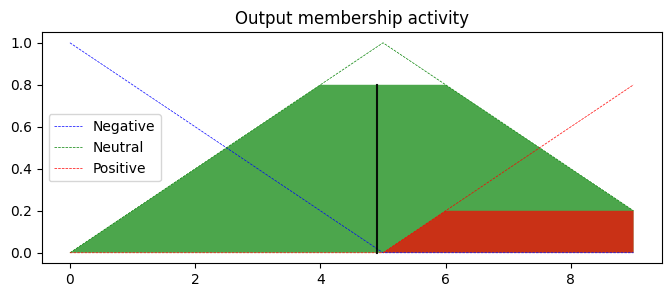

In [13]:

# We need the activation of our fuzzy membership functions at these values
p_level_lo = fuzz.interp_membership(x_p, p_lo, posscore)
p_level_md = fuzz.interp_membership(x_p, p_md, posscore)
p_level_hi = fuzz.interp_membership(x_p, p_hi, posscore)

n_level_lo = fuzz.interp_membership(x_n, n_lo, negscore)
n_level_md = fuzz.interp_membership(x_n, n_md, negscore)
n_level_hi = fuzz.interp_membership(x_n, n_hi, negscore)

    # Now we take our rules and apply them. Rule 1 concerns bad food OR nice.
    # The OR operator means we take the maximum of these two.
active_rule1 = np.fmin(p_level_lo, n_level_lo)
active_rule2 = np.fmin(p_level_md, n_level_lo)
active_rule3 = np.fmin(p_level_hi, n_level_lo)
active_rule4 = np.fmin(p_level_lo, n_level_md)
active_rule5 = np.fmin(p_level_md, n_level_md)
active_rule6 = np.fmin(p_level_hi, n_level_md)
active_rule7 = np.fmin(p_level_lo, n_level_hi)
active_rule8 = np.fmin(p_level_md, n_level_hi)
active_rule9 = np.fmin(p_level_hi, n_level_hi)

    # Now we apply this by clipping the top off the corresponding output
    # membership function with `np.fmin`

n1=np.fmax(active_rule4,active_rule7)
n2=np.fmax(n1,active_rule8)
op_activation_lo = np.fmin(n2,op_Neg)

neu1=np.fmax(active_rule1,active_rule5)
neu2=np.fmax(neu1,active_rule9)
op_activation_md = np.fmin(neu2,op_Neu)

p1=np.fmax(active_rule2,active_rule3)
p2=np.fmax(p1,active_rule6)
op_activation_hi = np.fmin(p2,op_Pos)

op0 = np.zeros_like(x_op)

# Aggregate all three output membership functions together
aggregated = np.fmax(op_activation_lo,
                     np.fmax(op_activation_md, op_activation_hi))

# Calculate defuzzified result
op = fuzz.defuzz(x_op, aggregated, 'centroid')   #one of two common agg options
output=round(op,2)

op_activation = fuzz.interp_membership(x_op, aggregated, op)  # for plot

#     Visualize Aggregated Membership
#    fig, ax0 = plt.subplots(figsize=(8, 3))
#
#    ax0.plot(x_op, op_Neg, 'b', linewidth=0.5, linestyle='--',label= 'Negative')
#    ax0.plot(x_op, op_Neu, 'g', linewidth=0.5, linestyle='--',label= 'Neutral')
#    ax0.plot(x_op, op_Pos, 'r', linewidth=0.5, linestyle='--',label= 'Positive')
#    ax0.fill_between(x_op, op0, aggregated, facecolor='Orange', alpha=0.7)
#    ax0.plot([op, op], [0, op_activation], 'k', linewidth=1.5, alpha=0.9)
#    ax0.set_title('Aggregated membership and result (line)')
#    ax0.legend()

#    # Turn off top/right axes
#    for ax in (ax0,):
#        ax.spines['top'].set_visible(False)
#        ax.spines['right'].set_visible(False)
#        ax.get_xaxis().tick_bottom()
#        ax.get_yaxis().tick_left()
#
#    plt.tight_layout()

# Visualize Output Membership
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_op, op0, op_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(x_op, op_Neg, 'b', linewidth=0.5, linestyle='--',label= 'Negative' )
ax0.fill_between(x_op, op0, op_activation_md, facecolor='g', alpha=0.7)
ax0.plot(x_op, op_Neu, 'g', linewidth=0.5, linestyle='--', label='Neutral')
ax0.fill_between(x_op, op0, op_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(x_op, op_Pos, 'r', linewidth=0.5, linestyle='--', label='Positive')
ax0.plot([op, op], [0, op_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Output membership activity')
ax0.legend()
#
#    # Turn off top/right axes
#    for ax in (ax0,):
#        ax.spines['top'].set_visible(False)
#        ax.spines['right'].set_visible(False)
#        ax.get_xaxis().tick_bottom()
#        ax.get_yaxis().tick_left()
#
#    plt.tight_layout()

print("\nFiring Strength of Negative (wneg): "+str(round(n2,4)))
print("Firing Strength of Neutral (wneu): "+str(round(neu2,4)))
print("Firing Strength of Positive (wpos): "+str(round(p2,4)))

print("\nResultant consequents MFs:" )
print("op_activation_low: "+str(op_activation_lo))
print("op_activation_med: "+str(op_activation_md))
print("op_activation_high: "+str(op_activation_hi))

print("\nAggregated Output: "+str(aggregated))

print("\nDefuzzified Output: "+str(output))

# Scale : Neg Neu Pos
if 0<(output)<3.33:    # R
    print("\nOutput after Defuzzification: Negative")
    sentiment.append("Negative")

elif 3.34<(output)<6.66:
    print("\nOutput after Defuzzification: Neutral")
    sentiment.append("Neutral")

elif 6.67<(output)<10:
    print("\nOutput after Defuzzification: Positive")
    sentiment.append("Positive")

print("Overall Doc sentiment: " +str(senti[j])+"\n")

Does not see the negative sentiments.

In [ ]:
count=0
for k in range(len(doc)):
    for j in range(len(sentiment)):
        if(sentiment_doc[k]==sentiment[j]):
            count=count+1
    print("Accuracy is: "+ str(round(count/len(doc)*100,2)))

In [38]:
print(len(doc))
print(len(sentiment_doc))
print(len(senti))

5842
5842
5842


In [41]:
from sklearn.metrics import f1_score, precision_score, recall_score
y_true = sentiment_doc
y_pred = doc

p1=precision_score(y_true, y_pred, average='macro')

print("Precision score (MACRO): " + str(round((p1*100),2)))

r1=recall_score(y_true, y_pred, average='macro')

print("Recall score (MACRO): " + str(round((r1*100),2)))

f1=f1_score(y_true, y_pred, average='macro')
f2=f1_score(y_true, y_pred, average='micro')

print("F1 score (MACRO): " + str(round((f1*100),2)))
print("F1 score (MICRO): "+ str(round((f2*100),2)))

end = time.time()
print("Execution Time: "+str(round((end - start),3))+" secs")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision score (MACRO): 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall score (MACRO): 0.0
F1 score (MACRO): 0.0
F1 score (MICRO): 0.0
Execution Time: 2452.29 secs


Below is the distribution of sentiment labels.

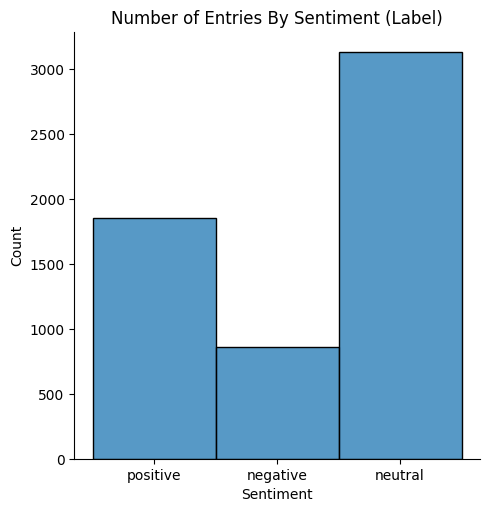

In [11]:
sns.displot(x = traindata["Sentiment"])
plt.title("Number of Entries By Sentiment (Label)")
plt.show()

In [14]:

traindata.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


##Now looking at FinVader code for financial fuzzy logic.
This is newer, and not entirely convincing. Most likely will point own model at similar financial phrase libraries.

In [ ]:
pip install finvader

In [32]:
#plt.tight_layout()

posts=[]  #tweets
senti=[]
sentiment=[]
fin_sentiment=[]

for j in range(len(traindata)):
    str1=traindata.Sentence[j]  #TweetText
    str2=str1.lower()
    posts.append(str2)   # converted into lower case  #tweets
    senti.append(traindata.Sentiment[j])  #sentiment_doc

In [ ]:
for k in range(len(traindata)):
    posts[k]=decontracted(posts[k])

sid = SentimentIntensityAnalyzer()

for j in range(len(traindata)):
    fin_sentiment.append(senti[j])
    ss = sid.polarity_scores(posts[j])
    posscore=ss['pos']
    negscore=ss['neg']
    neuscore=ss['neu']
    compoundscore=ss['compound']

    print(str(j+1)+" {:-<65} {}".format(posts[j], str(ss)))

    print("\nPositive Score for each  post :")    #tweet
    if (posscore==1):
        posscore=0.9
    else:
        posscore=round(posscore,1)
    print(posscore)

    print("\nNegative Score for each  post :") #tweet
    if (negscore==1):
        negscore=0.9
    else:
        negscore=round(negscore,1)
    print(negscore)

print("")

In [17]:
fin_data = pd.read_csv("/content/drive/MyDrive/colab/data/fin_data.csv",index_col=None)

In [42]:
text_data = "The period's sales dropped to EUR 30.6 m from EUR 38.3 m, according to the interim report, released today."

scores = finvader(text_data,
                  use_sentibignomics = True,
                  use_henry = True,
                  indicator = 'compound' )
print(scores)

-0.3549


In [43]:
fin_data['finvader'] = fin_data.Sentiment.apply(finvader,
                                   use_sentibignomics = True,
                                   use_henry = True,
                                   indicator="compound")
fin_data['finvader'].head()

0    0.3612
1   -0.3612
2    0.3612
3    0.0000
4    0.0000
Name: finvader, dtype: float64

In [ ]:
import numpy as np

conditions = [
    (fin_data['finvader'] > 0.33),
    (fin_data['finvader']> - 0.33) & (data['finvader'] < 0.33),
    (fin_data['finvader'] < - 0.33)
]
values = [1, 0, -1]

# create a new column and assign values to it using our lists as arguments
fin_data['finvader'] = np.select(conditions, values)

In [45]:
text = str(fin_data['finvader'])

scores = finvader(text,
                  use_sentibignomics = True,
                  use_henry = True,
                  indicator = 'compound' )

In [51]:


# calculate true positives (TP), true negatives (TN), false positives (FP) and false negatives (FN)

fin_data['finvader_correct'] = np.where((fin_data['Sentiment'] == fin_data['finvader']), 1, 0)
fin_data['finvader_TP'] = np.where((fin_data['Sentiment'] == 1) & (fin_data['finvader'] == 1), 1, 0)
fin_data['finvader_TN'] = np.where((fin_data['Sentiment'] == -1) & (fin_data['finvader'] == -1), 1, 0)
fin_data['finvader_FP'] = np.where((fin_data['Sentiment'] != 1) & (fin_data['finvader'] == 1), 1, 0)
fin_data['finvader_FN'] = np.where((fin_data['Sentiment'] != -1) & (fin_data['finvader'] == -1), 1, 0)

In [ ]:
print("FinVADER accuracy is:", round((((fin_data['finvader_correct'].sum()) / len(fin_data))) * 100, 2), "%")
print("FinVADER precision is:",  round(((fin_data['finvader_TP'].sum() / ((fin_data['finvader_TP'].sum() + fin_data['finvader_FP'].sum())))) * 100, 2), "%")
print("FinVADER recall is:",  round(((fin_data['finvader_TP'].sum() / ((fin_data['finvader_TP'].sum() + fin_data['finvader_FN'].sum())))) * 100, 2), "%")

print("FinVADER F1 score is:",  2 * round(
    (((fin_data['finvader_TP'].sum() / ((fin_data['finvader_TP'].sum() + fin_data['finvader_FP'].sum()))) *
     (((fin_data['finvader_TP'].sum() / ((fin_data['finvader_TP'].sum() + fin_data['finvader_FN'].sum())))))) /
     (((fin_data['finvader_TP'].sum() / ((fin_data['finvader_TP'].sum() + fin_data['finvader_FP'].sum()))) +
       (((fin_data['finvader_TP'].sum() / ((fin_data['finvader_TP'].sum() + fin_data['finvader_FN'].sum())))))))
    )* 100, 2), "%")

## Detailed Financial Sentiment Analysis by Mehmet Tekman featured on Kaggle

This works with GPU, and BERT pretrained model.
It has accuracy of 71%, while the loss is 0.79

I'd like to achieve overall better metrics.

In [ ]:
!pip install -q tf-models-official==2.11.0

In [ ]:
!pip install --upgrade tensorflow_hub

In [ ]:
from transformers import AutoModelForCausalLM,AutoTokenizer
import torch

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt

In [ ]:
MEAN_LEN_SENTENCES = np.mean([len(sentence) for sentence in data_df["Sentence"]])
print(MEAN_LEN_SENTENCES)

In [ ]:
unique_chars = pd.Series([char for sentence in data_df["Sentence"] for char in sentence]).unique()
print("Number of unique chars:",len(unique_chars))

In [ ]:
start = time.time()
# First we're going to load the pretrained vectors.
word2vec = {}
with open("../input/glove6b/glove.6B.100d.txt",encoding="UTF-8") as F:

    for line in F:
        # Index 0 will contain the word, the rest is the values of the vector.
        values = line.split()
        word = values[0]
        vec = np.asarray(values[1:],dtype="float32")
        word2vec[word] = vec

In [ ]:
# Remember that we did limit the tokenizer with the most used 10K words.
NUM_WORDS = 10000

# This shows the number of dimensions of the word vectors.
EMBEDDING_SIZE = 100

# First we're going to initialize the word vector matrix.
embedding_matrix = np.random.uniform(-1,1,(NUM_WORDS,EMBEDDING_SIZE))

In [ ]:
# Then we're going to change the random values with the vectors provided by Stanford
# university, if we can't find a word, it'll remain as random and will be
# optimized while training process.
for word,i in tokenizer.word_index.items():
    if i<NUM_WORDS:
        embedding_vector = word2vec.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [ ]:
embedding_matrix.shape

In [ ]:
NODE_SIZE = 256
NUM_CLASSES = 3
TOKEN_SIZE = MEAN_LEN_SENTENCES
​
model = Sequential()
​
# We've set trainable parameter True because there might be some
# words in the dataset that are not represented in pre-trained
# vectors
## 11/26 second run, setting to False
model.add(Embedding(input_dim=NUM_WORDS,
                    output_dim=EMBEDDING_SIZE,
                    weights=[embedding_matrix],
                    trainable=True
                   ))
​
model.add(GRU(NODE_SIZE,return_sequences=True))
model.add(GRU(NODE_SIZE,return_sequences=True))
model.add(GRU(NODE_SIZE,return_sequences=False))
model.add(Dense(NUM_CLASSES,activation="softmax"))

In [ ]:
model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

EPOCHS = 10
checkpoint_filepath = '/tmp/checkpoint'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

# Model weights are saved at the end of every epoch, if it's the best seen
# so far.
model.fit(epochs=EPOCHS, callbacks=[model_checkpoint_callback])

# The model weights (that are considered the best) are loaded into the
# model.
model.load_weights(checkpoint_filepath)

In [ ]:
model.summary()

In [ ]:
history = model.fit(x_train,y_train,validation_data=(x_eval,y_eval),epochs=20)

In [ ]:
history.history["accuracy"]

plt.title("Model Accuracy")
sns.lineplot(x=history.epoch,y=history.history["accuracy"])
sns.lineplot(x=history.epoch,y=history.history["val_accuracy"])
plt.legend(["Training Accuracy","Validation Accuracy"])
plt.show()

In [ ]:
model.evaluate(x_test,y_test)

As we can see, the accuracy is , while the loss is